# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

# Data Exploration

In [2]:
data=pd.read_csv(r"C:\Users\Abi Christi\OneDrive\Desktop\DS python\Mechine learning\Project\Project dataset.csv")
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [4]:
data.shape

(494021, 43)

In [5]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [6]:
data.duplicated().any()

True

In [7]:
data=data.drop_duplicates()
data.shape

(145586, 43)

In [8]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,145586.000000,1.455860e+05,1.455860e+05,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,...,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000
mean,132.025181,7.995700e+03,2.859780e+03,0.000137,0.020201,0.000048,0.100174,0.000515,0.491490,0.026177,...,181.468177,129.934678,0.553222,0.061389,0.092825,0.019048,0.291597,0.290978,0.110463,0.107675
std,1224.157053,1.820383e+06,6.080979e+04,0.011720,0.239368,0.010150,1.426798,0.028585,0.499929,3.311373,...,99.098197,114.714829,0.456236,0.147021,0.241123,0.060410,0.452492,0.453447,0.306097,0.304220
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,78.000000,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.470000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,117.000000,0.770000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.880000e+02,1.164750e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.030000,0.020000,1.000000,1.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Visualization

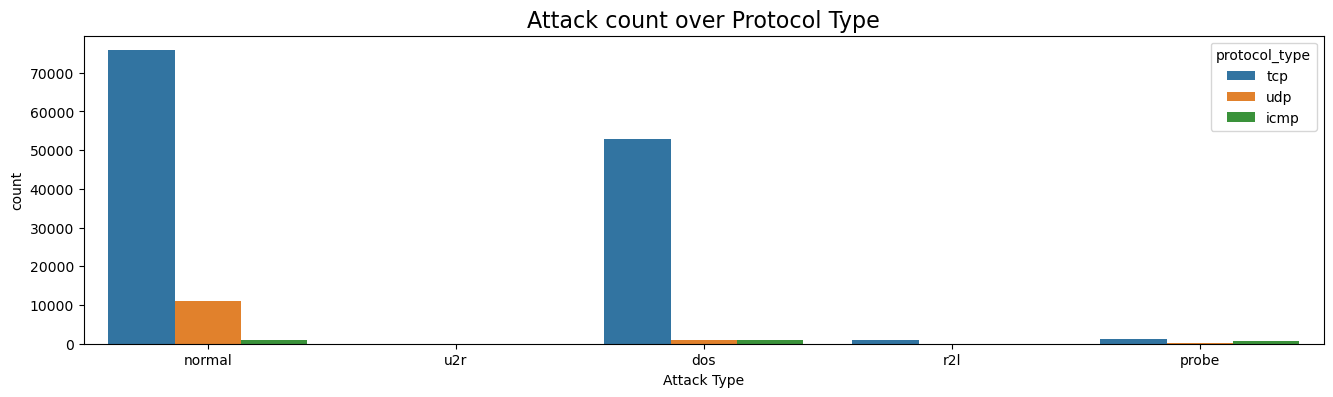

In [9]:
plt.figure(figsize=(16,4))
sns.countplot(x='Attack Type',data=data,hue='protocol_type')
plt.title("Attack count over Protocol Type",fontdict={'fontsize':16})
plt.show()

Text(0.5, 1.0, 'Proportion chart for Attack Types')

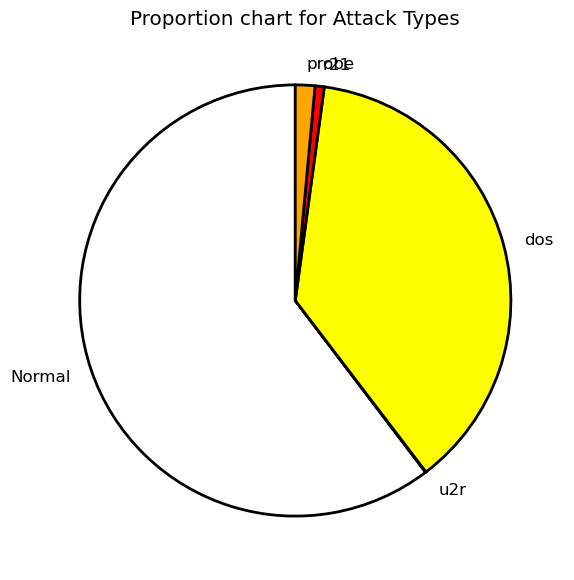

In [10]:
list1=list(data['Attack Type'][data['Attack Type']=='normal'])
list2=list(data['Attack Type'][data['Attack Type']=='u2r'])
list3=list(data['Attack Type'][data['Attack Type']=='dos'])
list4=list(data['Attack Type'][data['Attack Type']=='r2l'])
list5=list(data['Attack Type'][data['Attack Type']=='probe'])

plt.figure(figsize=(25,7))
slices=(len(list1),len(list2),len(list3),len(list4),len(list5))
labels=["Normal","u2r","dos","r21","probe"]
colors=['white','purple','yellow','red','orange']
plt.style.use('classic')
plt.pie(slices,labels=labels,colors=colors,wedgeprops={'linewidth':2,'edgecolor':'black'},startangle=90)
plt.title('Proportion chart for Attack Types')

# Data Preprocessing

In [11]:
data.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Dataset doesnt contain any null values.

In [12]:
data.columns.unique()

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

In [13]:
columns_to_drop = ['land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 
                   'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 
                   'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 
                   'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 
                   'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate']
data = data.drop(columns=columns_to_drop,axis=1)

In [14]:
for i in data.select_dtypes(include=["object"]):
    print(i,":",data[i].unique())

protocol_type : ['tcp' 'udp' 'icmp']
service : ['http' 'smtp' 'finger' 'domain_u' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'private' 'pop_3' 'ftp_data' 'rje' 'time' 'mtp' 'link'
 'remote_job' 'gopher' 'ssh' 'name' 'whois' 'domain' 'login' 'imap4'
 'daytime' 'ctf' 'nntp' 'shell' 'IRC' 'nnsp' 'http_443' 'exec' 'printer'
 'efs' 'courier' 'uucp' 'klogin' 'kshell' 'echo' 'discard' 'systat'
 'supdup' 'iso_tsap' 'hostnames' 'csnet_ns' 'pop_2' 'sunrpc' 'uucp_path'
 'netbios_ns' 'netbios_ssn' 'netbios_dgm' 'sql_net' 'vmnet' 'bgp' 'Z39_50'
 'ldap' 'netstat' 'urh_i' 'X11' 'urp_i' 'pm_dump' 'tftp_u' 'tim_i' 'red_i']
flag : ['SF' 'S1' 'REJ' 'S2' 'S0' 'S3' 'RSTO' 'RSTR' 'RSTOS0' 'OTH' 'SH']
target : ['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']
Attack Type : ['normal' 'u2r' 'dos'

In [15]:
data.shape

(145586, 21)

## Encoding

In [16]:
lab1=LabelEncoder()
lab2=LabelEncoder()
lab3=LabelEncoder()
lab4=LabelEncoder()
lab5=LabelEncoder()

In [17]:
    data['protocol_type']=lab1.fit_transform(data['protocol_type'])
    data['service']=lab2.fit_transform(data['service'])
    data['flag']=lab3.fit_transform(data['flag'])
    data['target']=lab4.fit_transform(data['target'])
    data['Attack Type']=lab5.fit_transform(data['Attack Type'])

In [18]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,1,22,9,181,5450,1.0,0.0,0.00,9,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,11,1
1,0,1,22,9,239,486,1.0,0.0,0.00,19,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,11,1
2,0,1,22,9,235,1337,1.0,0.0,0.00,29,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,11,1
3,0,1,22,9,219,1337,1.0,0.0,0.00,39,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,11,1
4,0,1,22,9,217,2032,1.0,0.0,0.00,49,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,22,9,310,1881,1.0,0.0,0.40,86,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,11,1
494017,0,1,22,9,282,2286,1.0,0.0,0.00,6,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,11,1
494018,0,1,22,9,203,1200,1.0,0.0,0.17,16,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,11,1
494019,0,1,22,9,291,1200,1.0,0.0,0.17,26,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,11,1


# Modeling and Evaluation

In [19]:
x=data.drop('Attack Type',axis=1)
y=data['Attack Type']

In [20]:
x.shape

(145586, 20)

In [21]:
y.shape

(145586,)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
LGR=LogisticRegression()
DTC=DecisionTreeClassifier()
KNC=KNeighborsClassifier(n_neighbors=15)
SVC=SVC()
RFC=RandomForestClassifier()

In [26]:
LGR.fit(x_train,y_train)
y_pred=LGR.predict(x_test)
print("Confusiom Metrix is\n",confusion_matrix(y_test,y_pred))
print("Classification Report\n",classification_report(y_test,y_pred))
LGR.score(x_test,y_test)

Confusiom Metrix is
 [[10375   495    13    11     0]
 [  135 17460    15     0     0]
 [   32    58   343     1     0]
 [   12     6     1   153     0]
 [    1     3     0     0     4]]
Classification Report
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     10894
           1       0.97      0.99      0.98     17610
           2       0.92      0.79      0.85       434
           3       0.93      0.89      0.91       172
           4       1.00      0.50      0.67         8

    accuracy                           0.97     29118
   macro avg       0.96      0.82      0.87     29118
weighted avg       0.97      0.97      0.97     29118



0.9731094168555533

In [27]:
DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
print("Confusiom Metrix is\n",confusion_matrix(y_test,y_pred))
print("Classification Report\n",classification_report(y_test,y_pred))
DTC.score(x_test,y_test)

Confusiom Metrix is
 [[10894     0     0     0     0]
 [    0 17610     0     0     0]
 [    1     0   431     0     2]
 [    1     0     2   169     0]
 [    0     0     0     0     8]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10894
           1       1.00      1.00      1.00     17610
           2       1.00      0.99      0.99       434
           3       1.00      0.98      0.99       172
           4       0.80      1.00      0.89         8

    accuracy                           1.00     29118
   macro avg       0.96      1.00      0.97     29118
weighted avg       1.00      1.00      1.00     29118



0.9997939418916134

In [28]:
KNC.fit(x_train,y_train)
y_pred=KNC.predict(x_test)
print("Confusiom Metrix is\n",confusion_matrix(y_test,y_pred))
print("Classification Report\n",classification_report(y_test,y_pred))
KNC.score(x_test,y_test)

Confusiom Metrix is
 [[10892     2     0     0     0]
 [    3 17605     2     0     0]
 [    2    13   419     0     0]
 [    1     2     3   166     0]
 [    0     2     0     0     6]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10894
           1       1.00      1.00      1.00     17610
           2       0.99      0.97      0.98       434
           3       1.00      0.97      0.98       172
           4       1.00      0.75      0.86         8

    accuracy                           1.00     29118
   macro avg       1.00      0.94      0.96     29118
weighted avg       1.00      1.00      1.00     29118



0.9989697094580672

In [29]:
SVC.fit(x_train,y_train)
y_pred=SVC.predict(x_test)
print("Confusiom Metrix is\n",confusion_matrix(y_test,y_pred))
print("Classification Report\n",classification_report(y_test,y_pred))
SVC.score(x_test,y_test)

Confusiom Metrix is
 [[10893     1     0     0     0]
 [    0 17609     1     0     0]
 [    1    10   423     0     0]
 [    1     2     0   167     2]
 [    0     1     0     0     7]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10894
           1       1.00      1.00      1.00     17610
           2       1.00      0.97      0.99       434
           3       1.00      0.97      0.99       172
           4       0.78      0.88      0.82         8

    accuracy                           1.00     29118
   macro avg       0.95      0.96      0.96     29118
weighted avg       1.00      1.00      1.00     29118



0.9993474826567759

In [30]:
RFC.fit(x_train,y_train)
y_pred=RFC.predict(x_test)
print("Confusiom Metrix is\n",confusion_matrix(y_test,y_pred))
print("Classification Report\n",classification_report(y_test,y_pred))
RFC.score(x_test,y_test)

Confusiom Metrix is
 [[10894     0     0     0     0]
 [    0 17610     0     0     0]
 [    1     0   433     0     0]
 [    0     0     0   172     0]
 [    0     1     0     0     7]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10894
           1       1.00      1.00      1.00     17610
           2       1.00      1.00      1.00       434
           3       1.00      1.00      1.00       172
           4       1.00      0.88      0.93         8

    accuracy                           1.00     29118
   macro avg       1.00      0.97      0.99     29118
weighted avg       1.00      1.00      1.00     29118



0.9999313139638711

In [41]:
model_scores={"Random forest": RFC.score(x_test,y_test),
                          "SVC":SVC.score(x_test,y_test),
                          "KNeighbours":KNC.score(x_test,y_test),
                          "Decision Tree":DTC.score(x_test,y_test),
                          "Logistic regression":LGR.score(x_test,y_test)}
model_scores=pd.DataFrame(list(model_scores.items()),columns=['Model','Score'])
model_scores

,Model,Score
0,Random forest,0.999931
1,SVC,0.999347
2,KNeighbours,0.998970
3,Decision Tree,0.999794
4,Logistic regression,0.973109
